In [4]:
from math import *
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# Tolerância 
tol = 1e-10

# Comprimento da aleta (m)
L = 300e-3

# Densidade (kg/mˆ3)
d = 2700

# Condutividade térmica (W/(mK))
k = 180

# Calor específico (J/(kgK))
c = 896

# Temperatura na extremidade
Text = 25

# Temperatura da base
Tb = 100

# Ambiente 
Tinf = 50

# W/mˆK
h = 50

a = k/(d*c)

r = 0.1 

p = 2 * pi * r    
Atr = pi * r**2 

dx=0.01

nx = int(L/dx)
#C
ct = (h*p/k*Atr)*(Text-Tinf)

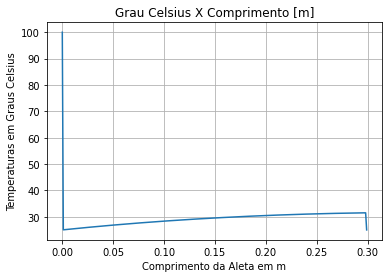

In [12]:
#ANALITICAL 

def calculate_theta(Ts,Ta):
    return Ts - Ta

def calculate_m(h,P,k,A):
    return sqrt((h*P)/(k*A))

def calculate_M(h,P,A,k,theta):
    return sqrt(h*P*A*k) * theta

def fin_heat_transfer(M,m,L,h,k):

    num= sinh(m*L) + (h/(m*k)) * cosh(m*L)

    den= cosh(m*L) + (h/(m*k)) * sinh(m*L)

    return M * (num/den)


def fin_temp_distribution(m,L,h,k,x):

    num = cosh(m*(L-x)) + (h/(m*k)) * sinh(m*(L-x))

    den = cosh(m*L) + (h/(m*k)) * sinh(m*L)

    return (num/den)

def effectiveness(qa,h,Ab,theta):

    return qa/(h*Ab*theta)

def efficiency(qa,h,As,theta):

    return qa/(h*As*theta)

def temperature(tamb, text, temp_distrib):
    return temp_distrib*(text - tamb) + tamb

result_analitical=[]

lista=np.arange(0,L,1e-3)

m=calculate_m(h,p,k,Atr)

theta=calculate_theta(Text,Tinf)

M=calculate_M(h,p,Atr,k,theta)

for values in lista:
    t=temperature(Tinf,Text,fin_temp_distribution(m,L,h,k,values))
    result_analitical.append(t)

result_analitical[0]=100
result_analitical[-1]=25

plt.plot(lista,result_analitical)
plt.xlabel("Comprimento da Aleta em m")
plt.ylabel("Temperaturas em Graus Celsius")
plt.title("Grau Celsius X Comprimento [m]")
plt.grid()
plt.show()